In [2]:
# ############################################################

# ## parsing_by_date ##

# ############################################################

# -- Designed by

#    김상원

# -- Produced by Mar. 31, 2020. (Ver.1.)

# -- Description: xxx

# ============================================================

In [57]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

In [24]:
df = pd.read_csv("/Users/sangwon/workspace/school/bithumb_analysis/raw_data/2018-05-btc-krw.csv") # csv load

In [5]:
df.dtypes # identifying column type 

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [6]:
## converting timestamp column type 'object' to 'datetime'
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price                 int64
fee                   int64
amount                int64
side                  int64
dtype: object

In [7]:
## converting timestamp to detailed date column
df['timestamp_year_month_day']       = df['timestamp'].dt.date         # YYYY-MM-DD(문자)
df['timestamp_year']       = df['timestamp'].dt.year         # 연(4자리숫자)
df['timestamp_month']      = df['timestamp'].dt.month        # 월(숫자)
df['timestamp_month_name'] = df['timestamp'].dt.month_name() # 월(문자)

df['timestamp_day']        = df['timestamp'].dt.day          # 일(숫자)
df['timestamp_time']       = df['timestamp'].dt.time         # HH:MM:SS(문자)
df['timestamp_hour']       = df['timestamp'].dt.hour         # 시(숫자)
df['timestamp_minute']     = df['timestamp'].dt.minute       # 분(숫자)
df['timestamp_second']     = df['timestamp'].dt.second       # 초(숫자)

In [8]:
df

,timestamp,quantity,price,fee,amount,side,timestamp_year_month_day,timestamp_year,timestamp_month,timestamp_month_name,timestamp_day,timestamp_time,timestamp_hour,timestamp_minute,timestamp_second
0,2018-05-01 01:06:02,0.8064,10164000,0,-8196250,0,2018-05-01,2018,5,May,1,01:06:02,1,6,2
1,2018-05-01 01:06:16,0.1000,10163000,0,1016300,1,2018-05-01,2018,5,May,1,01:06:16,1,6,16
2,2018-05-01 01:06:20,0.1000,10163000,0,1016300,1,2018-05-01,2018,5,May,1,01:06:20,1,6,20
3,2018-05-01 01:06:24,0.3382,10162000,0,3436788,1,2018-05-01,2018,5,May,1,01:06:24,1,6,24
4,2018-05-01 01:06:28,0.1000,10153000,0,1015300,1,2018-05-01,2018,5,May,1,01:06:28,1,6,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23290,2018-05-31 23:19:25,0.2509,8338000,0,2092004,1,2018-05-31,2018,5,May,31,23:19:25,23,19,25
23291,2018-05-31 23:21:03,0.0390,8342000,0,325338,1,2018-05-31,2018,5,May,31,23:21:03,23,21,3
23292,2018-05-31 23:21:05,0.4258,8342000,0,3552024,1,2018-05-31,2018,5,May,31,23:21:05,23,21,5
23293,2018-05-31 23:21:08,0.1126,8342000,0,939309,1,2018-05-31,2018,5,May,31,23:21:08,23,21,8


In [9]:
## creating 'day - amount' connection
group_day_amount = df['amount'].groupby(df['timestamp_day'])

In [10]:
## 일별 transaction 수
group_day_amount.size()

timestamp_day
1      505
2      407
3      527
4     1002
5      559
6      689
7     1015
8     1157
9     1061
10     498
11    1106
12    1494
13    1415
14    1185
15    1293
16    1284
17     928
18     922
19     573
20     506
21     624
22     484
23     703
24     885
25     487
26     257
27     222
28     311
29     448
30     378
31     370
Name: amount, dtype: int64

In [11]:
## 일별 총 손익량
group_day_amount.sum()

timestamp_day
1    -17802234
2      8295332
3     10138584
4       545803
5       340552
6    -15021496
7     -9802781
8     -4478454
9     32020288
10   -15454910
11    15948021
12      716218
13      506235
14      748015
15     -642716
16   -33671859
17    35135338
18      827709
19      722379
20   -26828987
21    28321486
22   -23719995
23    23599623
24   -12506828
25    12749313
26   -13815553
27     3720588
28    -5858398
29    16548664
30      187538
31      531831
Name: amount, dtype: int64

In [12]:
## creating 'day - earning amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_day_amount_positive = df2['amount'].groupby(df2['timestamp_day'])

In [13]:
# 일별 수익 transaction 수
group_day_amount_positive.size()

timestamp_day
1     302
2     212
3     291
4     581
5     321
6     447
7     720
8     796
9     668
10    289
11    710
12    950
13    916
14    714
15    945
16    828
17    602
18    649
19    362
20    330
21    395
22    351
23    485
24    500
25    294
26    172
27    138
28    188
29    251
30    216
31    245
Name: amount, dtype: int64

In [14]:
# 일별 수익량
group_day_amount_positive.sum()

timestamp_day
1      717288802
2      556368315
3      853401686
4     1812511408
5      955927119
6     1079537488
7     1633907661
8     2261280750
9     1790217680
10     918973913
11    1748230958
12    1844350809
13    1876379212
14    2061334907
15    2460913560
16    2052901506
17    1546594426
18    1514323102
19     889631353
20     789460214
21     954023745
22     833107084
23    1147547739
24    1055529545
25     681984676
26     261136899
27     237710205
28     431632616
29     524002315
30     580552058
31     563514765
Name: amount, dtype: int64

In [15]:
## creating 'day - loss amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_day_amount_negative = df3['amount'].groupby(df3['timestamp_day'])

In [16]:
# 일별 손해 transaction 수
group_day_amount_negative.size()

timestamp_day
1     203
2     195
3     236
4     421
5     238
6     242
7     295
8     361
9     393
10    209
11    396
12    544
13    499
14    471
15    348
16    456
17    326
18    273
19    211
20    176
21    229
22    133
23    218
24    385
25    193
26     85
27     84
28    123
29    197
30    162
31    125
Name: amount, dtype: int64

In [17]:
# 일별 손해량
group_day_amount_negative.sum()

timestamp_day
1     -735091036
2     -548072983
3     -843263102
4    -1811965605
5     -955586567
6    -1094558984
7    -1643710442
8    -2265759204
9    -1758197392
10    -934428823
11   -1732282937
12   -1843634591
13   -1875872977
14   -2060586892
15   -2461556276
16   -2086573365
17   -1511459088
18   -1513495393
19    -888908974
20    -816289201
21    -925702259
22    -856827079
23   -1123948116
24   -1068036373
25    -669235363
26    -274952452
27    -233989617
28    -437491014
29    -507453651
30    -580364520
31    -562982934
Name: amount, dtype: int64

In [18]:
# 일별 절대값 총합
absolute_negative_sum=group_day_amount_negative.sum()
absolute_negative_sum = absolute_negative_sum * (-1)
absolute_total_amout=absolute_negative_sum+group_day_amount_positive.sum()
absolute_total_amout

timestamp_day
1     1452379838
2     1104441298
3     1696664788
4     3624477013
5     1911513686
6     2174096472
7     3277618103
8     4527039954
9     3548415072
10    1853402736
11    3480513895
12    3687985400
13    3752252189
14    4121921799
15    4922469836
16    4139474871
17    3058053514
18    3027818495
19    1778540327
20    1605749415
21    1879726004
22    1689934163
23    2271495855
24    2123565918
25    1351220039
26     536089351
27     471699822
28     869123630
29    1031455966
30    1160916578
31    1126497699
Name: amount, dtype: int64

In [45]:
## 일별 계산 table 생성
dfs = [group_day_amount.size(), group_day_amount.sum(), group_day_amount_positive.size(), group_day_amount_positive.sum(), group_day_amount_negative.size(), group_day_amount_negative.sum(), absolute_total_amout, absolute_negative_sum]
day_df_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_day'), dfs)
day_df_final.columns = [ "daily transaction", "daily income", "daily Yield transaction", "daily Yield", "daily loss transaction", "daily loss", "daily absolute amount", "daily absolute negative amount"]
day_df_final

,daily transaction,daily income,daily Yield transaction,daily Yield,daily loss transaction,daily loss,daily absolute amount,daily absolute negative amount
timestamp_day,,,,,,,,
1,505,-17802234,302,717288802,203,-735091036,1452379838,735091036
2,407,8295332,212,556368315,195,-548072983,1104441298,548072983
3,527,10138584,291,853401686,236,-843263102,1696664788,843263102
4,1002,545803,581,1812511408,421,-1811965605,3624477013,1811965605
5,559,340552,321,955927119,238,-955586567,1911513686,955586567
6,689,-15021496,447,1079537488,242,-1094558984,2174096472,1094558984
7,1015,-9802781,720,1633907661,295,-1643710442,3277618103,1643710442
8,1157,-4478454,796,2261280750,361,-2265759204,4527039954,2265759204
9,1061,32020288,668,1790217680,393,-1758197392,3548415072,1758197392


In [46]:
day_df_final.to_csv("/Users/sangwon/workspace/school/bithumb_analysis/table/daily_result_table.csv", header=True, index=True, encoding = 'utf-8')

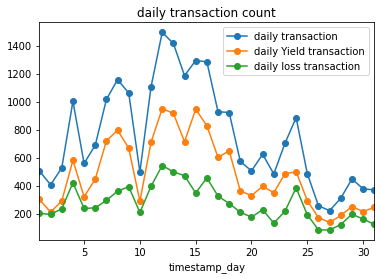

In [84]:
day_df_final[['daily transaction', 'daily Yield transaction', 'daily loss transaction']].plot(title='daily transaction count', marker='o')
plt.savefig('/Users/sangwon/workspace/school/bithumb_analysis/graph/daily transaction count.png', dpi=300)

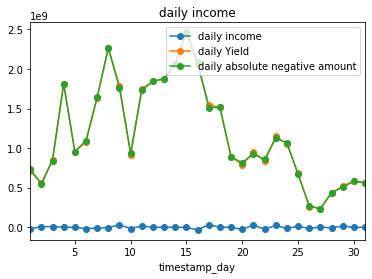

In [85]:
day_df_final[['daily income', 'daily Yield', 'daily absolute negative amount']].plot(title='daily income', marker='o')
plt.savefig('/Users/sangwon/workspace/school/bithumb_analysis/graph/daily income.png', dpi=300)

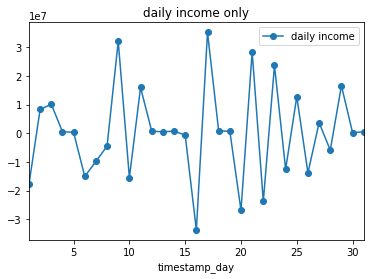

In [86]:
day_df_final[['daily income']].plot(title='daily income only', marker='o')
plt.savefig('/Users/sangwon/workspace/school/bithumb_analysis/graph/daily income only.png', dpi=300)